In [1]:
import sys
import os
%matplotlib inline

In [2]:
# get current working directory
os.getcwd()
# change directory
os.chdir('../')
os.getcwd()

'/Users/hisharakeshanigallagedona/Documents/GitHub/ACTC_MD_ML'

In [3]:
from rdkit.Chem.Draw import rdMolDraw2D
from src.trainers import Trainers
from src.polymerSMILES import polymers
from src.dataProcessing import * #DataPreprocessing #computeTanimotoSimilarity #* #data_load, computeTanimotoSimilarity, get_dissimilarity_map, featurizer, normalizedata
from src.solver import *

In [4]:
# load smiles
polymers_dict = polymers.get_data() # get rdkit formats of the polymer smiles 

In [5]:
# instantiate data preprocessing toolbox
preprocess = DataPreprocessing()

## A0 -No transfomation

In [6]:
data = preprocess.data_load(filename ='1-0-hgk-MD-ActCoeff-processed_Activity.csv')

In [7]:
## assign X, y
(X, y, MFprints) = preprocess.featurizer(data, polymers_dict,  'activity') # descr = 'solvation' or 'activity'

## A1/A2 -PCA transfomation

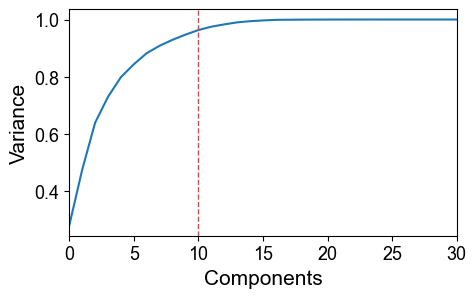

In [8]:
preprocess.visualize_PCA(x = X, length = MFprints.shape[1], type = 'ALL')

In [9]:
(data_solvation_scaler, X_train, X_test, y_train, y_test) = preprocess.normalizedata(X, y, splitRatio=0.2, state = 48, transform = True, property = None)
print(f"X_train, X_test, y_train, & y_test has shapes of {X_train.shape}, {X_test.shape}, {y_train.shape}, & {y_test.shape} respectively.")

X_train, X_test, y_train, & y_test has shapes of (64, 153), (16, 153), (64,), & (16,) respectively.


In [10]:
# transform features using PCA
print("***********************A1*************************")
pca_X_train_MDFP, pca_X_test_MDFP = preprocess.convertInputsPCA(X_train, X_test, MFprints, n_comp = 15, type = 'MDFP')
print(f"pca_X_train_MDFP & pca_X_test_MDFP has shapes of {pca_X_train_MDFP.shape}, and {pca_X_test_MDFP.shape}, respectively.")
#
print("***********************A2*************************")
pca_X_train_ALL, pca_X_test_ALL = preprocess.convertInputsPCA(X_train, X_test, MFprints, n_comp = 15, type = 'All')
print(f"pca_X_train_ALL & pca_X_test_ALL has shapes of {pca_X_train_ALL.shape}, and {pca_X_test_ALL.shape}, respectively.")



***********************A1*************************
pca_X_train_MDFP & pca_X_test_MDFP has shapes of (64, 40), and (16, 40), respectively.
***********************A2*************************
pca_X_train_ALL & pca_X_test_ALL has shapes of (64, 15), and (16, 15), respectively.


## ML models
## Hyperpaermater optimization
## SVR

In [ ]:
solver = svrSolvers()
trainer = Trainers()

res = solver.svrSolver(X_train=pca_X_train_ALL,
                X_test=pca_X_test_ALL,
                y_train=y_train,
                y_test=y_test)

h_params, best_F = solver.get_best(res)

score = trainer.trainSVR_SingleOutput(h_params=h_params,
                        X_train=X_train,
                        X_test=X_test,
                        y_train=y_train,
                        y_test=y_test,
                        folds=5)


In [ ]:
print(h_params)
print("%0.2f accuracy with a standard deviation of %0.2f. R^2: %0.2f" %
        (score[0], score[1], score[2]))

## Hyper-parameter optimization(ANN regression)

In [ ]:
solver = annSolvers()
trainer = Trainers()

res = solver.annSolver(X_train=pca_X_train_ALL,
                X_test=pca_X_test_ALL,
                y_train=y_train,
                y_test=y_test)

h_params, best_F = solver.get_best(res)

score = trainer.trainANN_SingleOutput(h_params=h_params,
                        X_train=X_train,
                        X_test=X_test,
                        y_train=y_train,
                        y_test=y_test,
                        folds=5)



In [ ]:
print(h_params)
print("%0.2f accuracy with a standard deviation of %0.2f. R^2: %0.2f" %
        (score[0], score[1], score[2]))

activation                 = ['logistic', 'tanh', 'relu']
solver                     = ['lbfgs', 'adam']
learning_rate              = ['constant', 'invscaling', 'adaptive']

## Hyper parameter optimization (random forest regression)

In [ ]:
solver = rfrSolvers()
trainer = Trainers()


res = solver.rfrSolver(X_train=pca_X_train_ALL,
                X_test=pca_X_test_ALL,
                y_train=y_train,
                y_test=y_test)

h_params, best_F = solver.get_best(res)

score = trainer.trainRFR_SingleOutput(h_params=h_params,
                        X_train=X_train,
                        X_test=X_test,
                        y_train=y_train,
                        y_test=y_test,
                        folds=5)



In [ ]:
max_features = ['auto', 'sqrt','log2']
bootstrap = ['True', 'False']
print(h_params)
print("%0.2f accuracy with a standard deviation of %0.2f. R^2: %0.2f" %
        (score[0], score[1], score[2]))

## load the model to predict unseen data

In [11]:
import joblib

model_filename='ACTC_MD_ML/models/activity-coefficient/Activityco_SVR_A2.pkl'
# load the model from disk
loaded_model = joblib.load(model_filename)

No handles with labels found to put in legend.


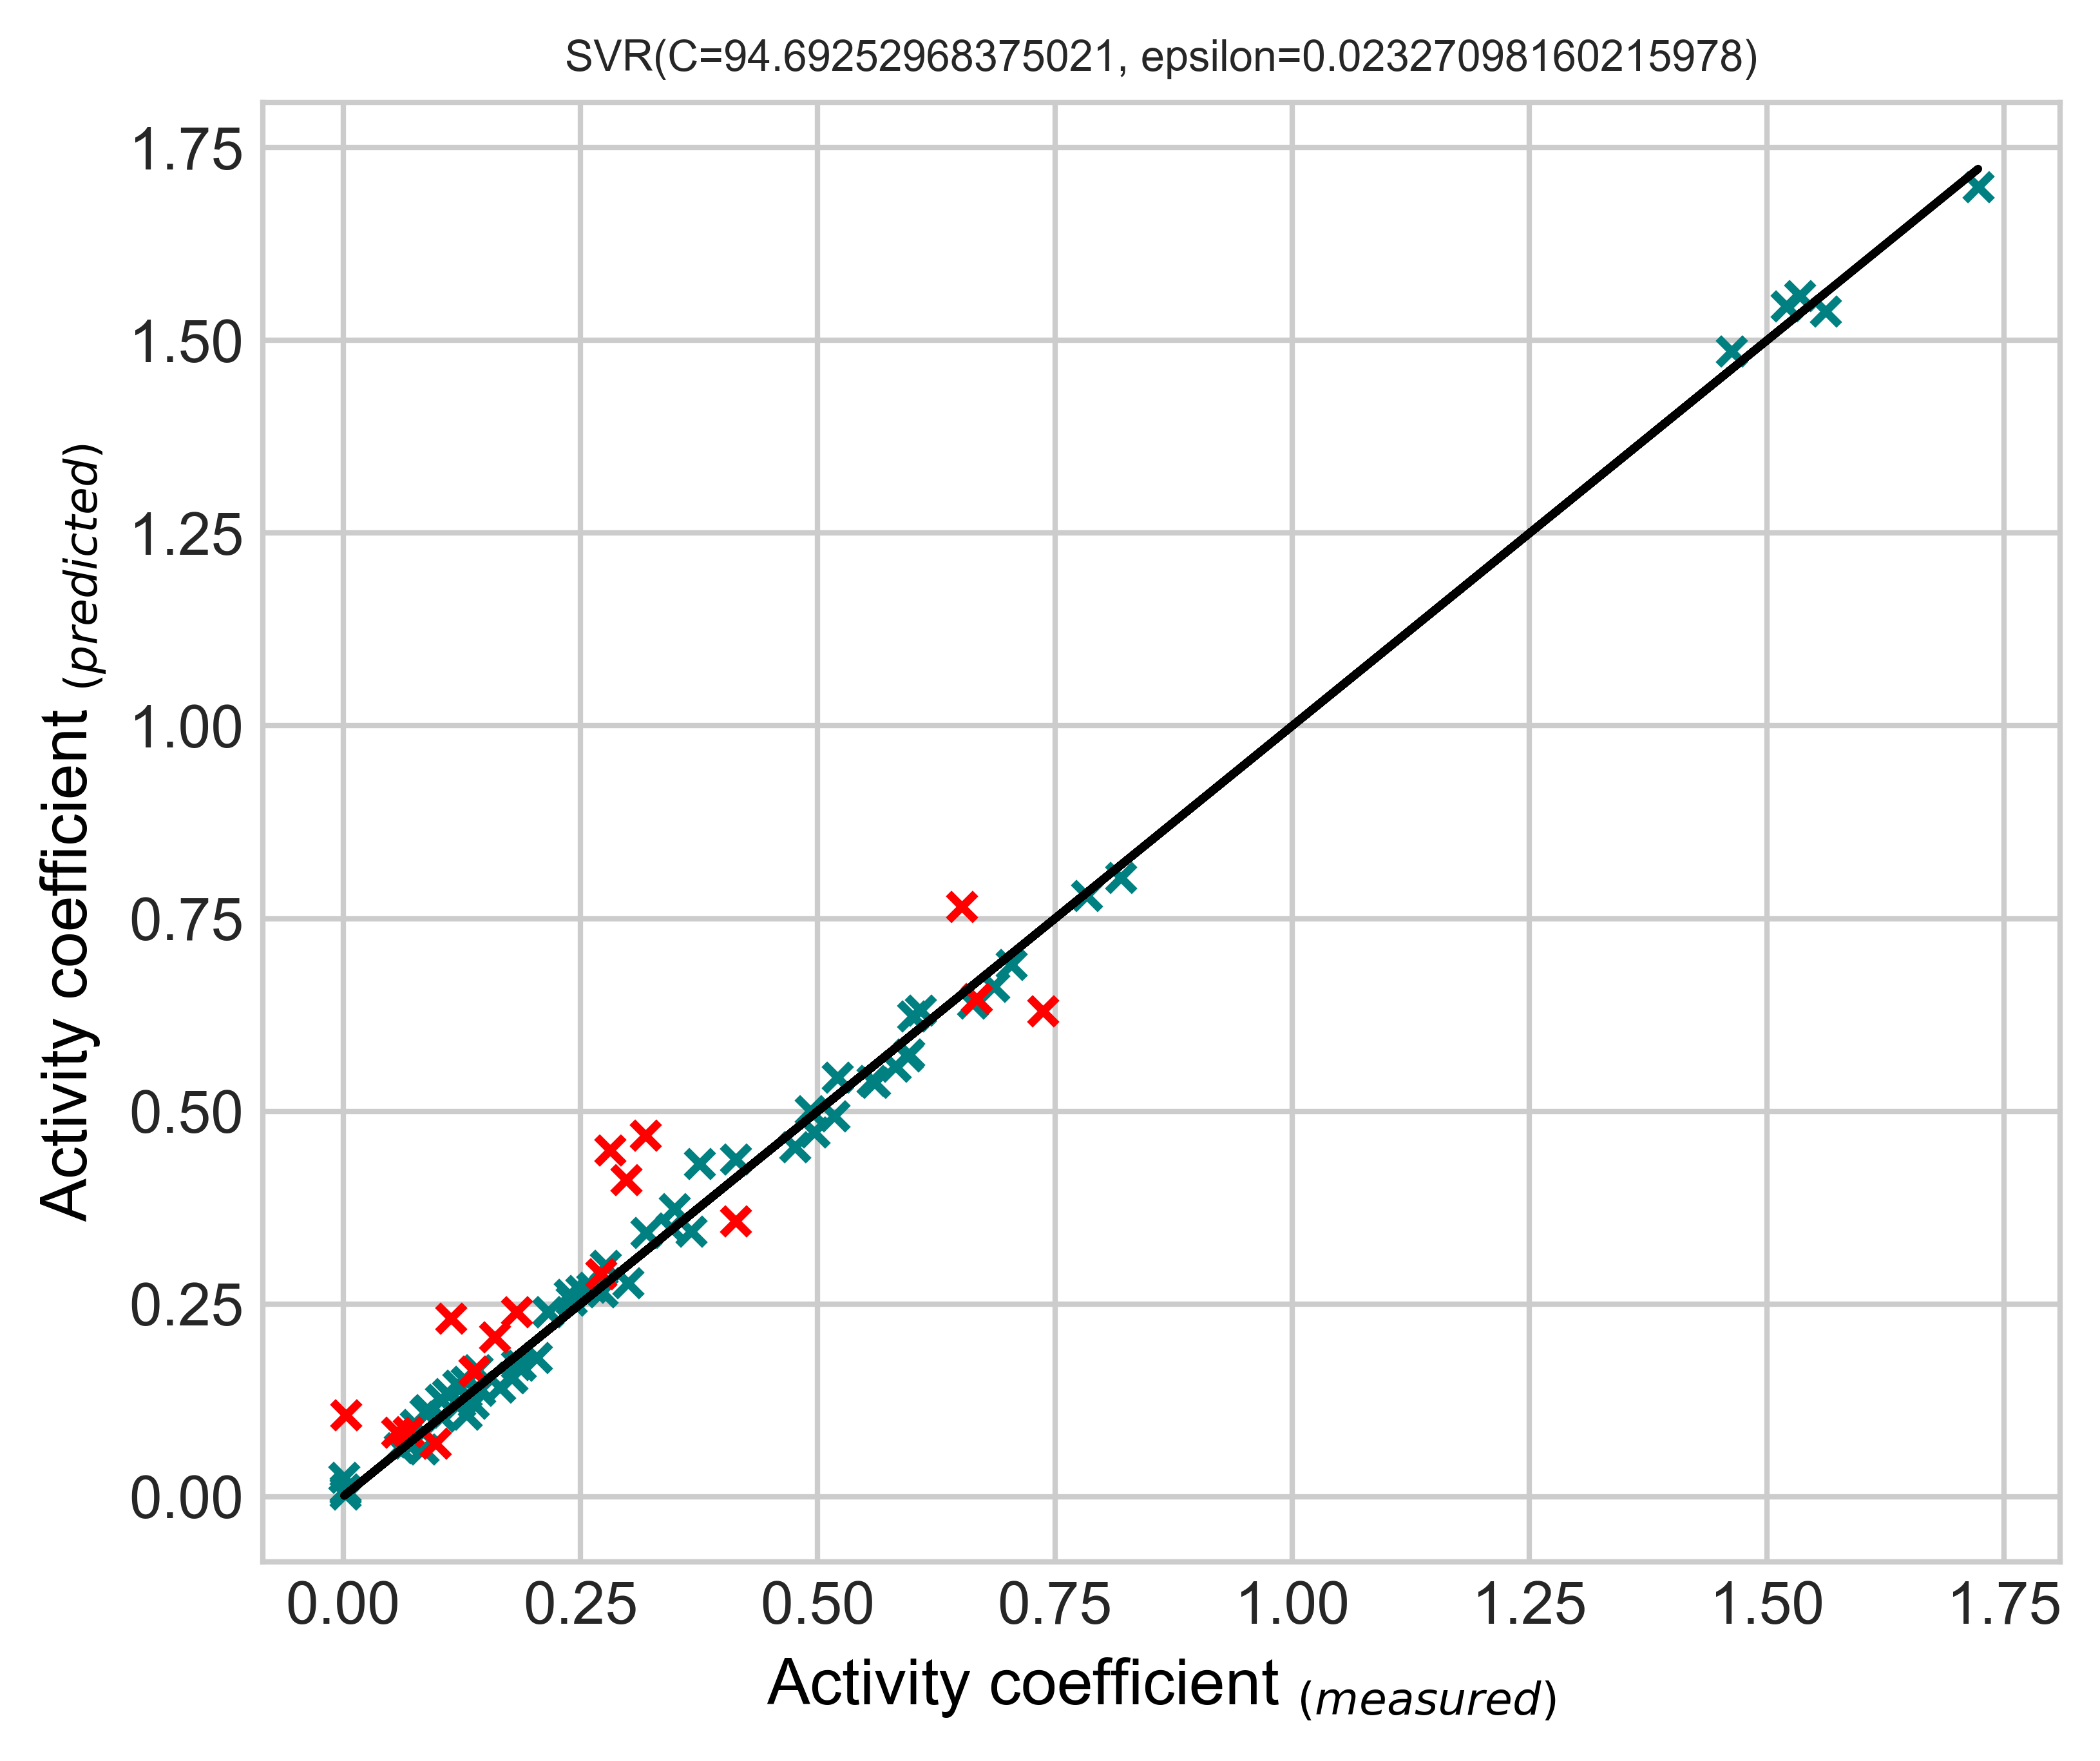

In [12]:
preprocess.plot(loaded_model,pca_X_train_ALL,y_train,pca_X_test_ALL,y_test)